## **Router**
## **ToolNode**

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_openai.chat_models import ChatOpenAI

llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini",
    temperature=0
)

In [3]:
def multiply(a:int, b:int)->int:
    """Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b

In [4]:
llm_with_tools = llm.bind_tools([multiply])

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode

In [6]:
## Node

def tool_calling_with_llm(state:MessagesState):
    return {"messages": llm_with_tools.invoke(state["messages"])}

In [7]:
## Build Graph

builder = StateGraph(MessagesState)

In [8]:
builder.add_node("LLM_WITH_TOOLS", tool_calling_with_llm)

In [9]:
builder.add_node("tools",ToolNode([multiply]))

In [10]:
builder.add_edge(START,"LLM_WITH_TOOLS")

In [11]:
builder.add_conditional_edges(
    "LLM_WITH_TOOLS",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

In [12]:
builder.add_edge("tools", END)

In [13]:
graph = builder.compile()

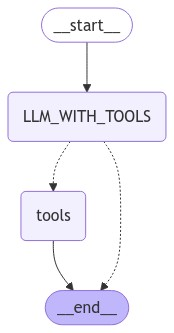

In [14]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
from langchain_core.messages import HumanMessage

In [21]:
messages = [HumanMessage(content="Hey How are you")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hey How are you
================================== Ai Message ==================================

I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?


In [22]:
messages = [HumanMessage(content="can u multiply 2 and 5")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can u multiply 2 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (call_2gl5ob4Ed827WNGkbLQxdVkl)
 Call ID: call_2gl5ob4Ed827WNGkbLQxdVkl
  Args:
    a: 2
    b: 5
================================= Tool Message =================================
Name: multiply

10
